# 18417696 - Zahara Vazir - Assignment 1

The objective of this assignment is to collect a dataset from one or more open web APIs, and use Python to prepare, analyse, and derive insights from the collected data. 

The assignment should be implemented as a single Jupyter Notebook (not a script file). Your notebook should be clearly documented, using comments and Markdown cells to explain the code and results. 

In [2]:
import requests #allows us to send HTTP requests using Python 
import json #allow us to encode and decode in JSON 
import pandas as pd #allows us to use data structures and analysis tools in Python  
from matplotlib import pyplot as plt #allows us to create visualisations  
import datetime 
import seaborn as sns #needed for heat maps
import matplotlib.pyplot as plt 

## Tasks: 

### 1. Data Identification and Collection: 

a)  Choose one or more APIs from the list of public web APIs provided at the link below. If you decide to use more than one API, these APIs should be related in some way. 

API used: https://covid19api.com

In [3]:
url_summary = 'https://api.covid19api.com/summary' #data about every country 
url_italy = 'https://api.covid19api.com/total/country/italy' #data about Italy 
url_southafrica = 'https://api.covid19api.com/total/country/south-africa' #data about South Africa 

I used the following function to print JSON-data.

In [4]:
def jprint(obj): 
    #create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

b)  Collect data from your API(s) using Python. Depending on the choice of API, you might need to repeat the collection process multiple times to download sufficient data for analysis. 

The first set of data will contain information on the number of new confirmed cases, new deaths, new recovered cases, total confirmed cases, total deaths and the total recovered cases for each country to date. 

In [5]:
response = requests.get(url_summary) #want data from the url_summary. sending a get request, getting a response object
data = response.json() #get data in readable json format
jprint(data) #print out data in json format 

{
    "Countries": [
        {
            "Country": "Afghanistan",
            "CountryCode": "AF",
            "Date": "2020-12-07T13:00:21Z",
            "NewConfirmed": 234,
            "NewDeaths": 10,
            "NewRecovered": 292,
            "Premium": {},
            "Slug": "afghanistan",
            "TotalConfirmed": 47306,
            "TotalDeaths": 1874,
            "TotalRecovered": 37685
        },
        {
            "Country": "Albania",
            "CountryCode": "AL",
            "Date": "2020-12-07T13:00:21Z",
            "NewConfirmed": 840,
            "NewDeaths": 16,
            "NewRecovered": 331,
            "Premium": {},
            "Slug": "albania",
            "TotalConfirmed": 42988,
            "TotalDeaths": 905,
            "TotalRecovered": 21617
        },
        {
            "Country": "Algeria",
            "CountryCode": "DZ",
            "Date": "2020-12-07T13:00:21Z",
            "NewConfirmed": 750,
            "NewDeaths": 15,
       

The second data set contains information on the number of people infected daily with COVID-19 in Italy.

In [6]:
response = requests.get(url_italy) #want data from url_italy. sending a get request, getting a response object
country = response.json()  #get data in readable json format
jprint(country) #print out data in json format 

[
    {
        "Active": 0,
        "City": "",
        "CityCode": "",
        "Confirmed": 0,
        "Country": "Italy",
        "CountryCode": "",
        "Date": "2020-01-22T00:00:00Z",
        "Deaths": 0,
        "Lat": "0",
        "Lon": "0",
        "Province": "",
        "Recovered": 0
    },
    {
        "Active": 0,
        "City": "",
        "CityCode": "",
        "Confirmed": 0,
        "Country": "Italy",
        "CountryCode": "",
        "Date": "2020-01-23T00:00:00Z",
        "Deaths": 0,
        "Lat": "0",
        "Lon": "0",
        "Province": "",
        "Recovered": 0
    },
    {
        "Active": 0,
        "City": "",
        "CityCode": "",
        "Confirmed": 0,
        "Country": "Italy",
        "CountryCode": "",
        "Date": "2020-01-24T00:00:00Z",
        "Deaths": 0,
        "Lat": "0",
        "Lon": "0",
        "Province": "",
        "Recovered": 0
    },
    {
        "Active": 0,
        "City": "",
        "CityCode": "",
        "Con

The second data set contains information on the number of people infected daily with COVID-19 in South Africa.

In [7]:
response = requests.get(url_southafrica) #want data from url_southafrica. sending a get request, getting a response object
country_two = response.json()  #get data in readable json format
jprint(country_two) #print out data in json format 

[
    {
        "Active": 0,
        "City": "",
        "CityCode": "",
        "Confirmed": 0,
        "Country": "South Africa",
        "CountryCode": "",
        "Date": "2020-01-22T00:00:00Z",
        "Deaths": 0,
        "Lat": "0",
        "Lon": "0",
        "Province": "",
        "Recovered": 0
    },
    {
        "Active": 0,
        "City": "",
        "CityCode": "",
        "Confirmed": 0,
        "Country": "South Africa",
        "CountryCode": "",
        "Date": "2020-01-23T00:00:00Z",
        "Deaths": 0,
        "Lat": "0",
        "Lon": "0",
        "Province": "",
        "Recovered": 0
    },
    {
        "Active": 0,
        "City": "",
        "CityCode": "",
        "Confirmed": 0,
        "Country": "South Africa",
        "CountryCode": "",
        "Date": "2020-01-24T00:00:00Z",
        "Deaths": 0,
        "Lat": "0",
        "Lon": "0",
        "Province": "",
        "Recovered": 0
    },
    {
        "Active": 0,
        "City": "",
        "CityCo

c)  Save the collected dataset in JSON format for subsequent analysis. 

I save the received data to a file. I am creating a new file, such as data_summary.json and starting from the beginning of the file, I am writing data into it. 

In [8]:
with open('data_summary.json', 'w') as outfile: #opens a new file and writes data into it
    json.dump(data, outfile) #the json.dump converts the data into json. it coverts a python object into a json string 
with open('data_italy.json', 'w') as outfile:
    json.dump(country, outfile)
with open('data_southafrica.json', 'w') as outfile:
    json.dump(country_two, outfile)

### 2. Data Preparation and Analysis: 

a)  Load the stored JSON dataset, and represent it using an appropriate structure (i.e. records/items as rows, described by features as columns).

I'm using panads dataframes to display the data clearly. 

In [9]:
with open("data_summary.json") as f:
    data = f.read() #reads the entire file
    data = json.loads(data) #this takes in a string and returns a json object

In [10]:
df = pd.DataFrame(data["Countries"]) #using pandas dataframe to print out the data for all the countries
df 

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,Afghanistan,AF,afghanistan,234,47306,10,1874,292,37685,2020-12-07T13:00:21Z,{}
1,Albania,AL,albania,840,42988,16,905,331,21617,2020-12-07T13:00:21Z,{}
2,Algeria,DZ,algeria,750,88252,15,2516,529,57146,2020-12-07T13:00:21Z,{}
3,Andorra,AD,andorra,45,7050,0,78,67,6238,2020-12-07T13:00:21Z,{}
4,Angola,AO,angola,55,15591,0,354,3,8338,2020-12-07T13:00:21Z,{}
...,...,...,...,...,...,...,...,...,...,...,...
186,Viet Nam,VN,vietnam,1,1366,0,35,0,1220,2020-12-07T13:00:21Z,{}
187,Western Sahara,EH,western-sahara,0,10,0,1,0,8,2020-12-07T13:00:21Z,{}
188,Yemen,YE,yemen,33,2337,6,639,2,1549,2020-12-07T13:00:21Z,{}
189,Zambia,ZM,zambia,18,17916,0,364,5,17173,2020-12-07T13:00:21Z,{}


In [11]:
with open("data_italy.json") as f:
    country = f.read() #reads the entire file 
    country = json.loads(country) #takes in string and returns a json object

In [12]:
df_italy = pd.DataFrame(country) #using pandas dataframe to diplay data clearly 
df_italy

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Italy,,,,,0,0,0,0,0,0,2020-01-22T00:00:00Z
1,Italy,,,,,0,0,0,0,0,0,2020-01-23T00:00:00Z
2,Italy,,,,,0,0,0,0,0,0,2020-01-24T00:00:00Z
3,Italy,,,,,0,0,0,0,0,0,2020-01-25T00:00:00Z
4,Italy,,,,,0,0,0,0,0,0,2020-01-26T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
315,Italy,,,,,0,0,1641610,57045,823335,761230,2020-12-02T00:00:00Z
316,Italy,,,,,0,0,1664829,58038,846809,759982,2020-12-03T00:00:00Z
317,Italy,,,,,0,0,1688939,58852,872385,757702,2020-12-04T00:00:00Z
318,Italy,,,,,0,0,1709991,59514,896308,754169,2020-12-05T00:00:00Z


In [13]:
with open("data_southafrica.json") as f:
    country_two = f.read() #read the entire file 
    country_two = json.loads(country_two) #this takes in a string and returns a json object

In [14]:
df_southafrica = pd.DataFrame(country_two) #using pandas dataframes
df_southafrica

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,South Africa,,,,,0,0,0,0,0,0,2020-01-22T00:00:00Z
1,South Africa,,,,,0,0,0,0,0,0,2020-01-23T00:00:00Z
2,South Africa,,,,,0,0,0,0,0,0,2020-01-24T00:00:00Z
3,South Africa,,,,,0,0,0,0,0,0,2020-01-25T00:00:00Z
4,South Africa,,,,,0,0,0,0,0,0,2020-01-26T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
315,South Africa,,,,,0,0,796472,21709,734305,40458,2020-12-02T00:00:00Z
316,South Africa,,,,,0,0,800872,21803,739367,39702,2020-12-03T00:00:00Z
317,South Africa,,,,,0,0,805804,21963,740450,43391,2020-12-04T00:00:00Z
318,South Africa,,,,,0,0,810449,22067,744298,44084,2020-12-05T00:00:00Z


b)  Apply any pre-processing steps that might be required to clean, filter or engineer the dataset before analysis. Where more than one API is used, apply suitable data integration methods. 

I'm using .drop to remove the columns whihc are not necessary as they may contain no information in the columns are may contain data that isnt useful to us. 

I'm changing the format of the date. I seperated the month and day from the date. Instead of having numbers for the day column, I changed it to the weekday names.  

In [15]:
df = df.drop(['Premium', 'CountryCode', 'Slug'], axis=1) #using .drop to revove these columns from tables 
df

,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,Afghanistan,234,47306,10,1874,292,37685,2020-12-07T13:00:21Z
1,Albania,840,42988,16,905,331,21617,2020-12-07T13:00:21Z
2,Algeria,750,88252,15,2516,529,57146,2020-12-07T13:00:21Z
3,Andorra,45,7050,0,78,67,6238,2020-12-07T13:00:21Z
4,Angola,55,15591,0,354,3,8338,2020-12-07T13:00:21Z
...,...,...,...,...,...,...,...,...
186,Viet Nam,1,1366,0,35,0,1220,2020-12-07T13:00:21Z
187,Western Sahara,0,10,0,1,0,8,2020-12-07T13:00:21Z
188,Yemen,33,2337,6,639,2,1549,2020-12-07T13:00:21Z
189,Zambia,18,17916,0,364,5,17173,2020-12-07T13:00:21Z


In [16]:
df['Date'] = pd.to_datetime(df.Date).dt.tz_localize(None) #changes the time in the date column 
df['Year'] = df['Date'].dt.year #puts the year in a seperate column 
df['Month'] = df['Date'].dt.strftime('%b') #puts the month in a seperate column. changes the month number to a name 
df['Day'] = df['Date'].dt.day #creates a new column for the day 
df

,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Year,Month,Day
0,Afghanistan,234,47306,10,1874,292,37685,2020-12-07 13:00:21,2020,Dec,7
1,Albania,840,42988,16,905,331,21617,2020-12-07 13:00:21,2020,Dec,7
2,Algeria,750,88252,15,2516,529,57146,2020-12-07 13:00:21,2020,Dec,7
3,Andorra,45,7050,0,78,67,6238,2020-12-07 13:00:21,2020,Dec,7
4,Angola,55,15591,0,354,3,8338,2020-12-07 13:00:21,2020,Dec,7
...,...,...,...,...,...,...,...,...,...,...,...
186,Viet Nam,1,1366,0,35,0,1220,2020-12-07 13:00:21,2020,Dec,7
187,Western Sahara,0,10,0,1,0,8,2020-12-07 13:00:21,2020,Dec,7
188,Yemen,33,2337,6,639,2,1549,2020-12-07 13:00:21,2020,Dec,7
189,Zambia,18,17916,0,364,5,17173,2020-12-07 13:00:21,2020,Dec,7


In [17]:
dw_mapping={ #this changes the numbers in the day column to the weekday names. it 'maps' the number to a name 
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df['DayOfTheWeek']=df['Date'].dt.weekday.map(dw_mapping)
df

,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Year,Month,Day,DayOfTheWeek
0,Afghanistan,234,47306,10,1874,292,37685,2020-12-07 13:00:21,2020,Dec,7,Monday
1,Albania,840,42988,16,905,331,21617,2020-12-07 13:00:21,2020,Dec,7,Monday
2,Algeria,750,88252,15,2516,529,57146,2020-12-07 13:00:21,2020,Dec,7,Monday
3,Andorra,45,7050,0,78,67,6238,2020-12-07 13:00:21,2020,Dec,7,Monday
4,Angola,55,15591,0,354,3,8338,2020-12-07 13:00:21,2020,Dec,7,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
186,Viet Nam,1,1366,0,35,0,1220,2020-12-07 13:00:21,2020,Dec,7,Monday
187,Western Sahara,0,10,0,1,0,8,2020-12-07 13:00:21,2020,Dec,7,Monday
188,Yemen,33,2337,6,639,2,1549,2020-12-07 13:00:21,2020,Dec,7,Monday
189,Zambia,18,17916,0,364,5,17173,2020-12-07 13:00:21,2020,Dec,7,Monday


In [18]:
df_italy = df_italy.drop(['Province', 'City', 'CityCode', 'CountryCode', 'Lat', 'Lon'], axis=1)
df_italy = df_italy.rename(columns={'Active': 'Current Cases'}) #changing the name of the active column to current cases 
df_italy

,Country,Confirmed,Deaths,Recovered,Current Cases,Date
0,Italy,0,0,0,0,2020-01-22T00:00:00Z
1,Italy,0,0,0,0,2020-01-23T00:00:00Z
2,Italy,0,0,0,0,2020-01-24T00:00:00Z
3,Italy,0,0,0,0,2020-01-25T00:00:00Z
4,Italy,0,0,0,0,2020-01-26T00:00:00Z
...,...,...,...,...,...,...
315,Italy,1641610,57045,823335,761230,2020-12-02T00:00:00Z
316,Italy,1664829,58038,846809,759982,2020-12-03T00:00:00Z
317,Italy,1688939,58852,872385,757702,2020-12-04T00:00:00Z
318,Italy,1709991,59514,896308,754169,2020-12-05T00:00:00Z


In [19]:
df_italy['Date'] = pd.to_datetime(df_italy.Date).dt.tz_localize(None)
df_italy['Year'] = df_italy['Date'].dt.year
df_italy['Month'] = df_italy['Date'].dt.strftime('%b')
df_italy['Day'] = df_italy['Date'].dt.day
df_italy

,Country,Confirmed,Deaths,Recovered,Current Cases,Date,Year,Month,Day
0,Italy,0,0,0,0,2020-01-22,2020,Jan,22
1,Italy,0,0,0,0,2020-01-23,2020,Jan,23
2,Italy,0,0,0,0,2020-01-24,2020,Jan,24
3,Italy,0,0,0,0,2020-01-25,2020,Jan,25
4,Italy,0,0,0,0,2020-01-26,2020,Jan,26
...,...,...,...,...,...,...,...,...,...
315,Italy,1641610,57045,823335,761230,2020-12-02,2020,Dec,2
316,Italy,1664829,58038,846809,759982,2020-12-03,2020,Dec,3
317,Italy,1688939,58852,872385,757702,2020-12-04,2020,Dec,4
318,Italy,1709991,59514,896308,754169,2020-12-05,2020,Dec,5


In [20]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df_italy['DayOfTheWeek']= df_italy['Date'].dt.weekday.map(dw_mapping)
df_italy

,Country,Confirmed,Deaths,Recovered,Current Cases,Date,Year,Month,Day,DayOfTheWeek
0,Italy,0,0,0,0,2020-01-22,2020,Jan,22,Wednesday
1,Italy,0,0,0,0,2020-01-23,2020,Jan,23,Thursday
2,Italy,0,0,0,0,2020-01-24,2020,Jan,24,Friday
3,Italy,0,0,0,0,2020-01-25,2020,Jan,25,Saturday
4,Italy,0,0,0,0,2020-01-26,2020,Jan,26,Sunday
...,...,...,...,...,...,...,...,...,...,...
315,Italy,1641610,57045,823335,761230,2020-12-02,2020,Dec,2,Wednesday
316,Italy,1664829,58038,846809,759982,2020-12-03,2020,Dec,3,Thursday
317,Italy,1688939,58852,872385,757702,2020-12-04,2020,Dec,4,Friday
318,Italy,1709991,59514,896308,754169,2020-12-05,2020,Dec,5,Saturday


In [21]:
df_southafrica = df_southafrica.drop(['Province', 'City', 'CityCode', 'CountryCode', 'Lat', 'Lon'], axis=1)
df_southafrica = df_southafrica.rename(columns={'Active': 'Current Cases'})
df_southafrica

,Country,Confirmed,Deaths,Recovered,Current Cases,Date
0,South Africa,0,0,0,0,2020-01-22T00:00:00Z
1,South Africa,0,0,0,0,2020-01-23T00:00:00Z
2,South Africa,0,0,0,0,2020-01-24T00:00:00Z
3,South Africa,0,0,0,0,2020-01-25T00:00:00Z
4,South Africa,0,0,0,0,2020-01-26T00:00:00Z
...,...,...,...,...,...,...
315,South Africa,796472,21709,734305,40458,2020-12-02T00:00:00Z
316,South Africa,800872,21803,739367,39702,2020-12-03T00:00:00Z
317,South Africa,805804,21963,740450,43391,2020-12-04T00:00:00Z
318,South Africa,810449,22067,744298,44084,2020-12-05T00:00:00Z


In [22]:
df_southafrica['Date'] = pd.to_datetime(df_italy.Date).dt.tz_localize(None)
df_southafrica['Year'] = df_italy['Date'].dt.year
df_southafrica['Month'] = df_italy['Date'].dt.strftime('%b')
df_southafrica['Day'] = df_italy['Date'].dt.day
df_southafrica

,Country,Confirmed,Deaths,Recovered,Current Cases,Date,Year,Month,Day
0,South Africa,0,0,0,0,2020-01-22,2020,Jan,22
1,South Africa,0,0,0,0,2020-01-23,2020,Jan,23
2,South Africa,0,0,0,0,2020-01-24,2020,Jan,24
3,South Africa,0,0,0,0,2020-01-25,2020,Jan,25
4,South Africa,0,0,0,0,2020-01-26,2020,Jan,26
...,...,...,...,...,...,...,...,...,...
315,South Africa,796472,21709,734305,40458,2020-12-02,2020,Dec,2
316,South Africa,800872,21803,739367,39702,2020-12-03,2020,Dec,3
317,South Africa,805804,21963,740450,43391,2020-12-04,2020,Dec,4
318,South Africa,810449,22067,744298,44084,2020-12-05,2020,Dec,5


In [23]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df_southafrica['DayOfTheWeek']= df_southafrica['Date'].dt.weekday.map(dw_mapping)
df_southafrica

,Country,Confirmed,Deaths,Recovered,Current Cases,Date,Year,Month,Day,DayOfTheWeek
0,South Africa,0,0,0,0,2020-01-22,2020,Jan,22,Wednesday
1,South Africa,0,0,0,0,2020-01-23,2020,Jan,23,Thursday
2,South Africa,0,0,0,0,2020-01-24,2020,Jan,24,Friday
3,South Africa,0,0,0,0,2020-01-25,2020,Jan,25,Saturday
4,South Africa,0,0,0,0,2020-01-26,2020,Jan,26,Sunday
...,...,...,...,...,...,...,...,...,...,...
315,South Africa,796472,21709,734305,40458,2020-12-02,2020,Dec,2,Wednesday
316,South Africa,800872,21803,739367,39702,2020-12-03,2020,Dec,3,Thursday
317,South Africa,805804,21963,740450,43391,2020-12-04,2020,Dec,4,Friday
318,South Africa,810449,22067,744298,44084,2020-12-05,2020,Dec,5,Saturday


c)  Analyse, characterise, and summarise the cleaned dataset, using tables and visualisations where appropriate. Clearly explain each step of this process, and interpret the results which are produced. Markdown cells should be used for the explanations and interpretations. 

Text(0.5, 1.0, 'Total Confirmed Cases for Each Country')

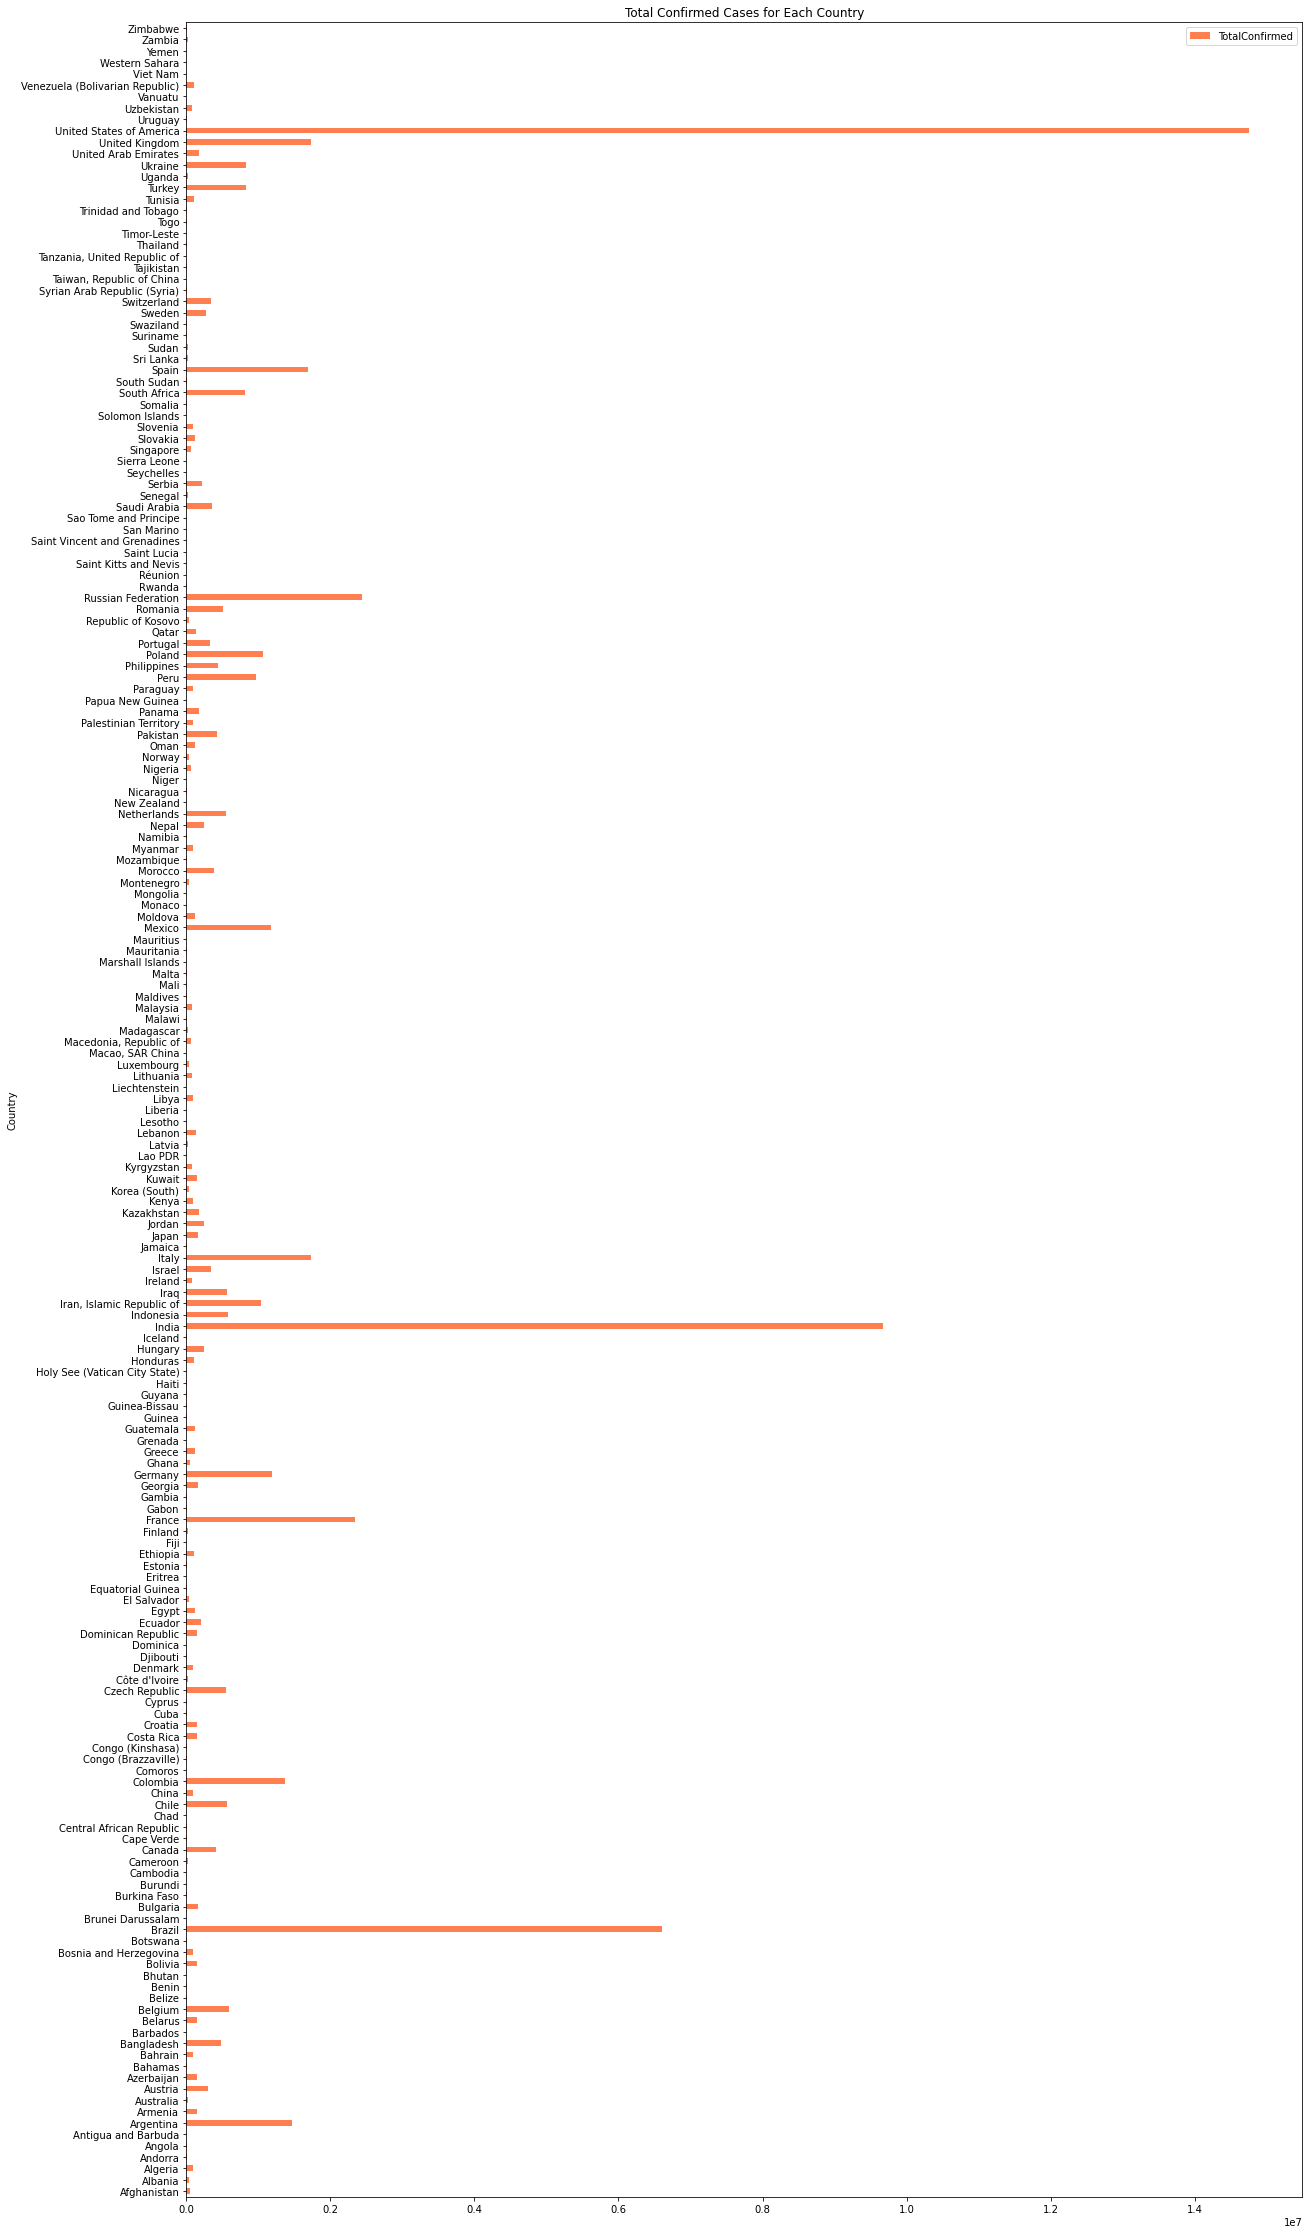

In [24]:
plt.rcParams["figure.figsize"]=20,40 #creating a horizontal bar chart to display the countries adn their total confirmed cases 
df.plot.barh(x='Country', y='TotalConfirmed' , color ='coral')
plt.title("Total Confirmed Cases for Each Country")

For my first graph, I have created a horizontal barchart. This represents the total number of confirmed cases for each country from the data I received. From the horizontal barchart, we can clearly see that the USA has the highest number of confirmed cases out of all the countries, followed closely by India and Brazil. From the graph we can see that the USA has more than 10 million covid cases, India has nearly 9 million covid cases and Brazil has nearly 6 million covid cases. I used a horizontal barchart as I think that it shows the number of covid cases for each country in a clear manner. 

Text(0.5, 1.0, 'Number of Total Deaths vs Total Recovered')

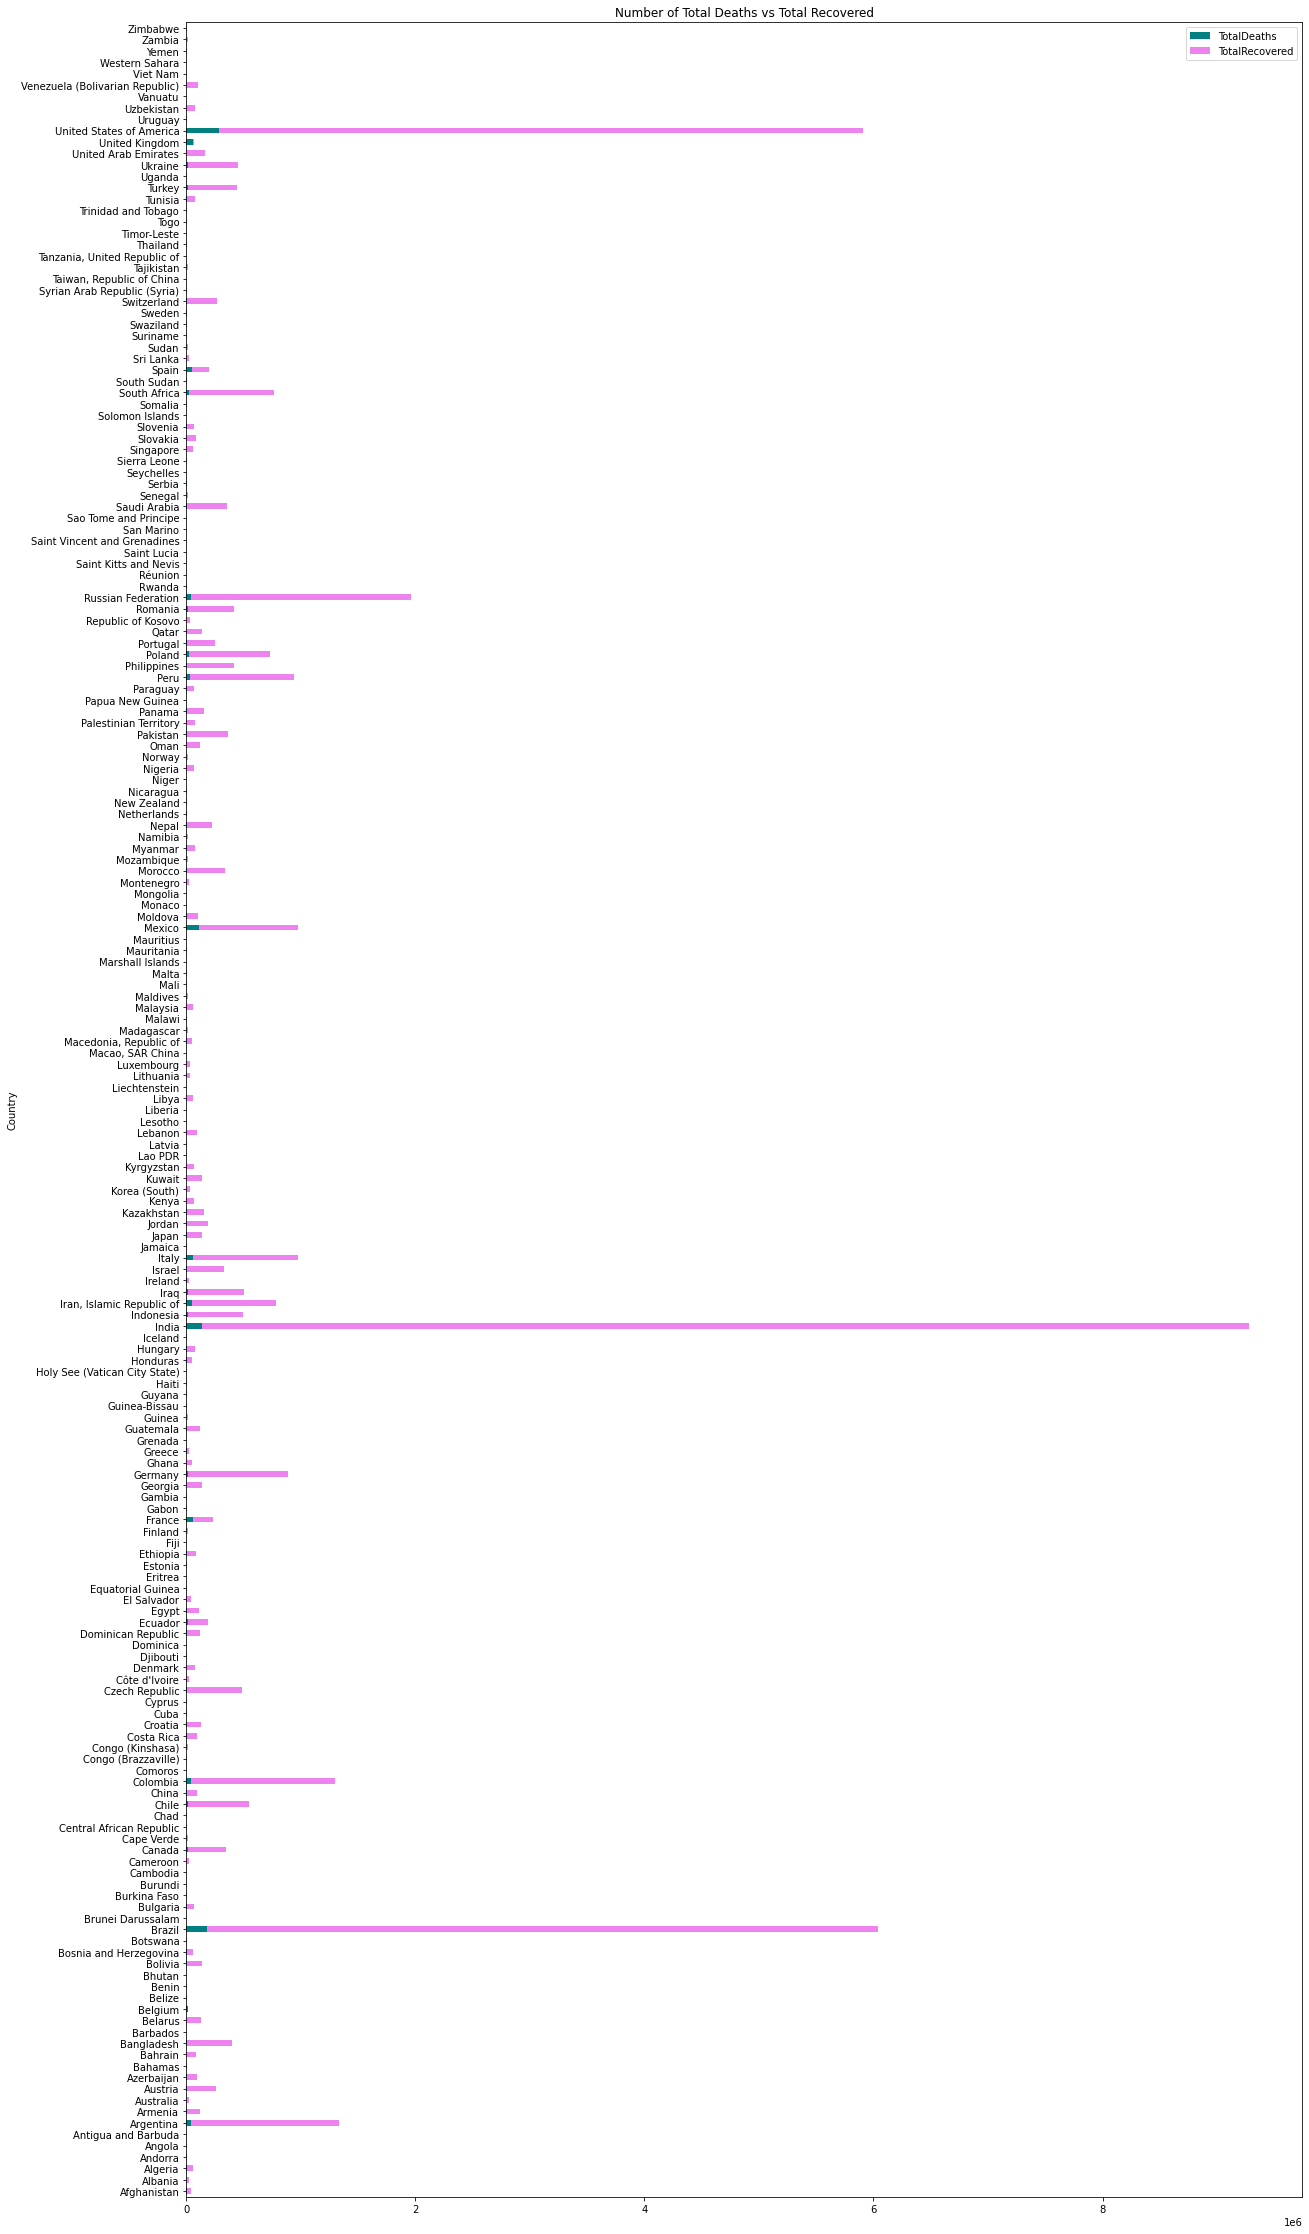

In [25]:
plt.rcParams["figure.figsize"]=20,40 #creating a stacked barchart to represent the total deaths and the total recovered cases for each country 
df.plot(x = 'Country', y = ['TotalDeaths', 'TotalRecovered'], kind="barh", stacked=True, color=["teal","violet"])
plt.title("Number of Total Deaths vs Total Recovered")

November 13th : Here I have made another horizontal bar chart to represent the total number of deaths and the total number of recovered cases for each country. From looking at the graph, for most countries, we can see that the number of people who have recovered from covid19 is much greater than the number of people who have died for it. Also from the graph, it is interesting to see that India has the highest number of people who have recovered from covid, whilst the USA, who has the highest number of confirmed covid cases in the world has the second highest number of people who have recovered from covid. This data is constantly changing, as the API summary gives us updated data everyday for all the countries, hence why the horizontal barchart changes. 

Let's choose the top-10 most infected countries

In [ ]:
top_10 = df.sort_values(by=['TotalConfirmed'], ascending=False, na_position='first').iloc[:10] #sorts the countries to find the top 10 countries in descending order affected by covid 

In [ ]:
plt.rcParams["figure.figsize"]=15,8 #creating a horizontal bar chart 
top_10.plot.barh(x='Country', y=['TotalConfirmed', 'TotalDeaths', 'TotalRecovered'], color=["deepskyblue", "royalblue", "darkcyan"])
plt.title("Top 10 Countries Affected by Covid19")

The above graph illustrates the top 10 countries that have been affected by covid19. The graph compares the total number of cases, total number of deaths and the total number of people who have recovered from covid. We can see from the graph that in the United Kingdom, the number of total deaths is higher than the number of people who have recovered from covid. This is rare to see as the majoirty of the countries in the world show data that the total recovery is higher than the total number of deaths. It is clear to us that in the USA, the total number of people who have recovered from covid is poor, as the total recovery is lower than India and Brazil's total recovery. India has the 2nd highest number of cases, whilst Brazil has the third highest number of confirmed covid cases in the world. From the graph, we can see that France and The Russian Federation both have a similar number of confirmed covid cases, but the total number of recovered cases is far lower in France when compared to The Russian Federation. This is the same case for Spain as the total number of deaths is not far off the total number of people who have recovered from covid, as a result Spain also has a low number of people who have recovered from the virus. Italy, which has the 10th highest number of total confirmed covid cases in the world, has a higher total recovered number compared to the United Kingdom, Spain and France. 

In [ ]:
plt.rcParams["figure.figsize"]=15,8 #create a horizontal barchart 
top_10.plot.barh(x='Country', y=['NewConfirmed', 'NewDeaths', 'NewRecovered'], color=["thistle", "darkmagenta", "orchid"])
plt.title("New Confirmed Cases vs New Deaths vs New Recovered for the Top 10 Countires Affected by Covid19")

November 13th : The above graph represents the new confirmed covid cases, the new deaths and the new recovered cases for today. From the graph, it is clear to us that the USA has the highest number of new confirmed covid cases, followed by Italy, which has the 10th highest number of confirmed covid cases in the world. India surprisingly has no new confirmed cases, no new deaths and no new recovered cases from covid. It is evident from this graph that the United Kingdom still has very poor recovery from covid, as the total number of recovered cases is lower than the total number of deaths. It also has a high number of of new confirmed covid cases. Brazil has a higher number of recovered cases compared to Italy, when Italy has a higher number of new confirmed covid cases. France is another country with low numbers of nely confirmed covid cases and new recovered cases from covid. This data is constatly changing, as the API summary gives us updated data everyday for all the countries, hence why the horizontal barchart changes.  

# I will be analysing and comparing the two countries, Italy and South-Africa as both countries have similar populations sizes

In [ ]:
plt.scatter(df_italy.Confirmed, df_italy.Deaths, color = "mediumpurple") #implementing a scatterplot 
plt.xlabel("Number of Confirmed Cases") #x-axis label 
plt.ylabel("Number of Deaths") #y-axis label 
plt.title("The Number of Deaths in Relation to Confirmed Covid Cases in Italy") #title 
plt.legend(["Relationship of Death and Confirmed Covid Cases in Italy"]) #legend

I have made a scatterplot to observe the relationship between the number of confirmed covid cases and the number of deaths in Italy. From the graph, we can see that there is a postivie correlation between the two variables, as the graph illustrates to us that as the number of confirmed cases increases, the number of deaths also increases in Italy. The number of confirmed covid cases is nearly 1.2 million and the number of deaths is aboive 40,000. We can tell that at the beginning, when the covid cases began to occur, there was a sharp increase in the number of cases, indicating a very strong correlation between the two at the beginning. This therefore gave an abrupt increase in the number of deaths. When the number of covid cases reached around 40,000, the number of cases started to slow down, hence there was also a reduction in the number of deaths as a result. The difference in the number of deaths in association with the number of confirmed covid cases is that Italy has about 20,000 more deaths. This is interesting as both countires have similar popualtion sizes, but Italy has clarly been affected more harshly by the virus. 

In [ ]:
plt.scatter(df_southafrica.Confirmed, df_southafrica.Deaths, color = "pink") #implemnting a scatterplot 
plt.xlabel("Number of Confirmed Cases")
plt.ylabel("Number of Deaths")
plt.title("The Number of Deaths in Relation to Confirmed Covid Cases in South-Africa")
plt.legend(["Relationship of Death and Confirmed Covid Cases"])

From the scatterplot above, it is obvious that South-Africa has less number of confrimed covid cases. The number of covid cases is just more than 700,000 and the number of deaths is a little over 20,000. We can see by the scatter plot that there is a positive correaltion between the two variables of number of deaths and the number of confirmed covid cases, so as confirmed covid cases increases, so does the number of deaths. Looking at this scatter plot, we can see that the number of deaths does not dramtically incline, when compared to the scatter plot for Italy. it gradually increases. There is also a small dip in the scatterplot when the number of cases reaches 400,000. 

In [ ]:
plt.scatter(df_italy.Confirmed, df_italy.Recovered, color = "orangered") #implemnting a scatterplot
plt.xlabel("Number of Confirmed Cases")
plt.ylabel("Number of Recoveries")
plt.title("The Number of Recoveries in Relation to Confirmed Covid Cases in Italy") 
plt.legend(["Relationship of Recoveries and Confirmed Covid Cases"])

For this scatterplot, I decided to look at the two variables, the number of confirmed cases and the number of recovered cases in Italy. From the graph, we can see that there is again a positive correlation between these two variables. We can see that as the number of confirmed cases increases, the number of recovered cases from covid also increases. There is a dramatic increase in the number of recovered cases at the beginning, this begins to steady a bit but still increases greatly as we can see. The total number of recovered cases in Italy is just about 400,000. 

In [ ]:
plt.scatter(df_southafrica.Confirmed, df_southafrica.Recovered, color = "green") #implemnting a scatterplot
plt.xlabel("Number of Confirmed Cases")
plt.ylabel("Number of Recoveries")
plt.title("The Number of Recoveries in Relation to Confirmed Covid Cases in South-Africa") 
plt.legend(["Relationship of Recoveries and Confirmed Covid Cases"])

This scatterplot represents the number of recoveries in relation to the number of confirmed covid cases in South-Africa. This scatter plot looks similar to the previous scatter plot for South-Africa which was about the number of deaths in realtion to the confirmed covid cases there. It is obvious from the graph that the number of recoveries is around 700,000. There is again a poitive correlation between these two variables. When comparing this scatterplot to Italy's scatterplot, we can see that in South Africa there are higher numbers of recoveries from covid, even though the number of cases is lower in South Africa. The differnece in recovered cases is around 300,000 between the two countries. 

In [ ]:
plt.scatter(df_italy.Confirmed, df_italy.Deaths, color = "mediumpurple") #implementing a scatterplot
plt.scatter(df_italy.Confirmed, df_italy.Recovered, color = "orangered")
plt.xlabel("Number of Confirmed Cases")
plt.ylabel("Number of Deaths and Recoveries")
plt.title("The Number of Deaths vs The Number of Recoveries in Relation to Confirmed Covid Cases in Italy")
plt.legend(["Relationship of Death and Confirmed Covid Cases", "Relationship of Recoveries and Confirmed Covid Cases"])

For this scatter plot, I decided to merge the two scatter plots above to compare the number of recoveries and the number of deaths in relation to the confirmed number of covid cases. It is visible from the graph that the number of recoveries is far greater than the number of deaths. We can see that when the scatter plot begins for the recoveries, there is a sharp incline compared to the scatter plot of the number of deaths. The number of deaths begins to steady before it is about to reach 50,000, while the recovery scatter plot keeps on increasing. From this it is apparent to us that the the number of deaths from covid is lower than the number of recoveries. 

In [ ]:
plt.scatter(df_southafrica.Confirmed, df_southafrica.Deaths, color = "pink") #implemnting a scatterplot
plt.scatter(df_southafrica.Confirmed, df_southafrica.Recovered, color = "green")
plt.xlabel("Number of Confirmed Cases")
plt.ylabel("Number of Deaths and Recoveries")
plt.title("The Number of Deaths vs The Number of Recoveries in Relation to Confirmed Covid Cases in South-Africa")
plt.legend(["Relationship of Death and Confirmed Covid Cases", "Relationship of Recoveries and Confirmed Covid Cases"])

For this scatterplot, I'm combining the two scatter plots for Souht-Africa. I'm looking at the number of recoveries and the number of deaths. We can see from the scatterplot that there is a far grater number of people who have recovered from covid in South-Africa than the number of people who have died from covid. The number of deaths remains very steady when set side by side by the number of recoveries. 

In [ ]:
plt.bar(df_italy['Month'], df_italy['Current Cases'], color=["mediumseagreen"]) #implemnting a barchart 
plt.title("Number of Active Cases in Italy per Month")
plt.xlabel("Months")
plt.ylabel("Number of Active Cases")
plt.legend(["Current Cases"])
plt.show()

The barchart above shows the number of active cases per month in Italy. From the graph, it is transparent that the first few cases were seen in February. The number of cases began to rise until May, where we saw a decrease in the number of cases until July. From July onwards, there has been an increase in the number of active cases. We can see that November, has the highest number of active cases out of any month. It has more than 600,00 active cases in total. Since then, the lowest number of cases were seen in February, when covid began. This shows the the sitation is getting worse in Italy. 

In [ ]:
plt.bar(df_southafrica['Month'], df_southafrica['Current Cases'], color=["hotpink"]) #implemnting a barchart
plt.title("Number of Active Cases in South-Africa per Month")
plt.xlabel("Months")
plt.ylabel("Number of Active Cases")
plt.legend(["Current Cases"])
plt.show()

This barchart shows the number of current cases per month in South-Africa. It is apparent that the first few cases can be seen in March. There is a rise in the number of current cases from March untul July. We can see that in July, it was recorded the month with the highest number of current cases in South-Africa. After July, it is evident that the number of current cases each month drops. In November, there were 50,000 current cases. Italy's barchart showing the number of current covid cases per month is much different. We can see that November currently has the highest number of covid cases, but this is not the case in South-Africa. It shows that South-Africa has control over the spread of covid there, while Italy is still struggling to fight it. When analysing the barcharts for each country, anothr compelling conclusion that can be made is that in July in South-Africa, it was the worst month as there was very high number of covid cases, nearly 175,000. But in Italy, in July it can be seen that July contained the lowest number of covid cases. It was less than 50,000 cases. 

In [ ]:
plt.plot(df_italy['Date'],df_italy['Deaths'], color='yellow') #implemnting a line graph
plt.xlabel("Date (Year-Month)")
plt.ylabel("Death")
plt.title("Death Rate in Italy")
plt.legend(["Number of Deaths"])
plt.show

The graph above exhibits the death rate of Italy over the months, from when covid frist began, which was in February, until now (November). From the line graph, we can see that the death rate increased rapidly from March until May, where it became a little steady. This because there was a rise in the number of covid cases during this time period as well. It then began to sharply incline again from October until now. THis is due to the number of cases that are beginning to rise in November. 

In [ ]:
plt.plot(df_southafrica['Date'],df_southafrica['Deaths'], color='turquoise') #implemnting a line graph
plt.xlabel("Date (Year-Month)")
plt.ylabel("Death")
plt.title("Death Rate in South-Africa")
plt.legend(["Number of Deaths"])
plt.show

From the line graph, it tells us that the death rate when covid first began is very slow until June. From June we can see a rise in the death rate. The death rate increases from after June. Comparing this line graph to Italy's death rate, we can  see that after March, Italy's death rate rapidly increased. Even though the first few cases in South-Africa were seen a month after Italy, the number of deaths didn't increase at a great amount, whereas in Italy it did. 

In [ ]:
plt.plot(df_italy['Date'],df_italy['Recovered'], color='teal') #implemnting a line graph
plt.xlabel("Date (Year-Month)")
plt.ylabel("Recovered")
plt.title("Recovery Rate in Italy")
plt.legend(["Number of Recoveries"])
plt.show

This next line plot presents the recovery rate form covid10 in Italy. We can see that from April until July, the recovery rate increased greatly. After July, it became a little slower and after October the recovery rate has inlcined again. The recovery rate isn't constant in Italy. We can see that from July to October, the recovery slows down as there were also less cases during this time. 

In [ ]:
plt.plot(df_southafrica['Date'],df_southafrica['Recovered'], color='slategray') #implemnting a line graph
plt.xlabel("Date (Year-Month)")
plt.ylabel("Recovered")
plt.title("Recovery Rate in South-Africa")
plt.legend(["Number of Recoveries"])
plt.show

In the above line graph, it illustrates the recovery rate in South-Africa. We can see that the recovery rate in the first few months was very slow. The recovery rate began to increase after June. In contrast to the recovery in Italy, it is much poorer in comparison to South-Africa. The recovery rate in July was low, even though it had the highest number of actice cases. We can see that the recovery rate increases in August, this is due to the fact that it takes time to recover for covid fully and so the affects of it can be seen in August.  

In [ ]:
plt.plot(df_italy['Date'],df_italy['Current Cases'], color='m') #implemnting a line graph
plt.xlabel("Date (Year-Month)")
plt.ylabel("Current Cases")
plt.title("Rate of Infection in Italy")
plt.legend(["Number of Infections"])
plt.show

This line plot expresses the rate of infection in Italy over time since covid19 began. From March there was a rise in the infection rate. It became a litte steady from June until August, where it began to rise rapidly again. The infection rate is at its peak at the moment in November.

In [ ]:
plt.plot(df_southafrica['Date'],df_southafrica['Current Cases'], color='red') #implemnting a line graph
plt.xlabel("Date (Year-Month)")
plt.ylabel("Current Cases")
plt.title("Rate of Infection in South-Africa")
plt.legend(["Number of Infections"])
plt.show

This is the infection rate in South-Africa. When covid first began, the infection rate was low. It starts to rise from June until Agusut. between July and August, South-Africa was at its peak with the infection rate. This is becuase the number of cases were also the highest in the country at this time. After August, the infection rate begins to decrease and we can see that currently in November, the infection rate is still becoming lower. The infection rate hasn't gone up since August. In contrast to the infection rate in Italy, we can see that the infection rate is at its peak currently, in November. This is also because the the number of active cases in Italy right now is soaring. 

In [ ]:
plt.plot(df_italy['Date'],df_italy['Deaths'], color='yellow') #implemnting a line graph
plt.plot(df_italy['Date'],df_italy['Recovered'], color='teal')
plt.plot(df_italy['Date'],df_italy['Current Cases'], color='m')
plt.xlabel("Date (Year-Month)")
plt.ylabel("Deaths/Recovered/Current Cases")
plt.title("Death Rate vs Recovery Rate vs Infection Rate in Italy")
plt.legend([ "Number of Deaths", "Number of Recoveries", "Number of Infections"])
plt.show

This line plot is comparing all three line graphs from above. We can see that in the beginning of March, the infection rate is growing very quickly and that the death rate and recovery rate were very simlar. The recovery rate surpassed the death rate at April, and it kept on rising. By May, the recovery rate was higher than the infection rate, whihc meant the number of cases had dropped as a result. For a period between June and August, the infection rate was lower than the death rate. This meeant that less people caught the virus, but some people who already had covid19, were dying from it. from October, the infection rate rapidly increased, and we can observe how it has surpassed the recovery rate and how the infection rate keeps on rising until now. The death rate has risen slightly, but it is still lower than the recovery rate. 

In [ ]:
plt.plot(df_southafrica['Date'],df_southafrica['Deaths'], color='turquoise') #implemnting a line graph
plt.plot(df_southafrica['Date'],df_southafrica['Recovered'], color='slategray')
plt.plot(df_southafrica['Date'],df_southafrica['Current Cases'], color='red')
plt.xlabel("Date (Year-Month)")
plt.ylabel("Deaths/Recovered/Current Cases")
plt.title("Death Rate vs Recovery Rate vs Infection Rate in South-Africa")
plt.legend([ "Number of Deaths", "Number of Recoveries", "Number of Infections"])
plt.show

We can see that the infection rate, the recovery rate and the death rate are all very low at the beginning and are the same for a while until May. the infection rate increases and reaches its peak in the months bwetween July and August. We can see that that the recovery rate is very high and that the death rate is much lower. The recovery rate soares after July, and it keeps in rising. The death rate is quite steady and it increases very slightly from June until November, but it is not a drastic change at all. 

In [ ]:
df_italy.sort_values('Current Cases', ascending = False)[['Current Cases','Month','Day']].head(5).style.background_gradient('magma')
#graph which sorts the current cases values in descending order. displays the 5 highest values for current cases and the day and month of them 

The graph above shows the top 5 days, where Italy had the highest cases. It is obvious that November was the month where covid19 peaked in Italy. The highest number of cases was seen on the 14th of November with 688,435 active cases. This is an astonishing amount compared to South-Africa. We can see from previous graphs that the infection rate increases during the month of November. 

In [ ]:
df_southafrica.sort_values('Current Cases', ascending = False)[['Current Cases','Month','Day']].head(5).style.background_gradient('magma')
#graph which sorts the current cases values in descending order. displays the 5 highest values for current cases and the day and month of them 

It is obvious that the worst month for covid19 in South-Africa was July, with the highest active cases reaching 173,590. From the line graph we make for the infection rate, it was clear form that grpagh that the infection rate was at its prime near the end of July. Comparing this graph to Italy's, it tell us that South-Africa had far lower amount of cases even though the size of both the popultations are quite similar. 

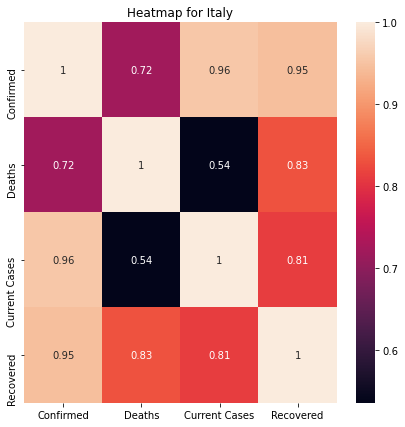

In [26]:
plt.rcParams['figure.figsize'] = (7,7) #creates a heatmap with a size of 7 by 7
sns.heatmap(df_italy[['Confirmed','Deaths','Current Cases','Recovered']].corr(), annot = True) # will contain data of confirmed, deaths, recovered and current cases 
plt.title('Heatmap for Italy')
plt.show()

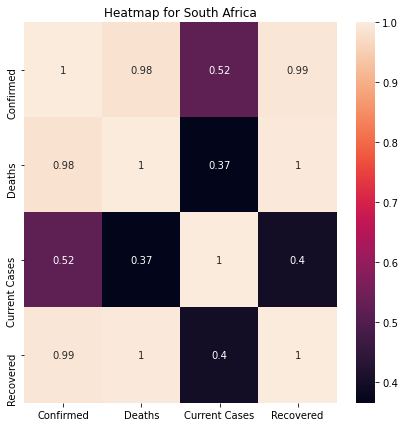

In [27]:
plt.rcParams['figure.figsize'] = (7,7) #creates a heatmap 
sns.heatmap(df_southafrica[['Confirmed','Deaths','Current Cases','Recovered']].corr(), annot = True)
plt.title('Heatmap for South Africa')
plt.show()

In [ ]:
df.describe()

Gives statistical data for all the countries  

In [ ]:
df_italy.describe()

Gives statistical data for Italy

In [ ]:
df_southafrica.describe()

Gives statistical data for South Africa 

## Insights From Analysis and Further Analysis Ideas : 

In relation to the analysis I have recieved, it was interesting to see how China, which has the higest population in the entire world was not in the top 10 countries to be affected by Covid19. The countries who were in the top 10 to be affected by Covid19 had nothing to do with the population of the countries but more about how the virus was controlled at the begining from when it first began and what restrictions were implemented in that country.
From the data, it was noticeable that the USA had the highest number of total confirmed covid cases in the world and the greatest number of covid related deaths, but the total recovery in the USA was not very satisfactory. This was apparent when we saw how India and Brazil, both had a higher total recovery compared to the USA. This could be due to fact that the USA government not taking the situation seriously, and not realising the awful affects covid would have on them resulting in many deaths which could have been avoided. The USA did not carry out lockdown early enough and there was no nationwide loackdown. Each state went into lockdown at different times and had its on own restirctions. There was no set of restrictions that each state had to follow to stop the spread of it. This definietly would have had an affect on the spread of covid.
Countries that had significantly better recovery rate must have implemented restrictions earlier on when covid was first seen in that contry and ensured that there were lockdowns taking place to stop the spread. 
There was no country in the continent of Africa to be in the top 10 countries related to covid19. 
In most countries, the total recovery is higher compared to the total deaths by covid, excpet for the United Kingdom. This was a rare observation. 

I looked at two countries in depth, Italy and South Africa. I chose these two countires as both their populations sizes are very similar. Italy is the 10th country in the world to be affected crudely by covid, where as South Africa has not been affected that greatly by it. From my graphs and analysis, it illustrated to me how Italy had a far greater number of confirmed covid cases and more deaths as a result of the virus. Where as in South Africa, the infection rate of covid started off quite slow and reached its peak in late July. The infection rate has since decreased and is still declining. In contrat to this, Italy's infection rate has gone up rapidly and are struggling considerably. Even though both the countries are similar in population sizes, they are both dealing with this situation in different ways. This may be the case that in Italy, the first few cases of covid could have been seen earlier than February, when it was first recorded, but the people who had a confirmed case of covid didn't know about it. This could have aided the spread of the virus quickly. In Italy lockdown was carried out too late so that economy wouldnt suffer. Only a few places in Italy were in lockdown. As a result of the lockdown occuring too late as it wasnt been taken seriosuly, the virus had gotten a chance to spread rapidly, increasing the number of covid cases in Italy. Whereas in South Africa, lockdown was implemented quite quickly, with tight restrictions in place. This combatted the spread of covid there. 

Further anlysis ideas I would like to carry out would include looking deeper in to what regions were badly affected by covid in Italy and South Africa. Which parts of these countries showed the highest number of covid cases. Another idea to further my analysis would be to get the number of deaths and the number of recovered cases per month, as the API that I used did not provide this information. I'd be interested in doing more analysis on how countries in Africa weren't affected very badly compared to the rest of the world as the countries were not in the top 10 mosr affected graph. Another way to do further analysis would be through machine learning methods. This would give a more detailed analysis and forecasting.  